In [1]:
import numpy as np
import pandas as pd

In [2]:
mri_csv = pd.read_csv('archive/oasis_longitudinal.csv')
mri_csv['Group'].replace('Converted', 'Demented', inplace=True)

In [3]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
mri_csv = mri_csv.fillna(mri_csv.mean())
mri_csv

/var/folders/25/hkg7hrfn7130z9vkbc1z1h580000gn/T/ipykernel_30919/2516103592.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mri_csv = mri_csv.fillna(mri_csv.mean())


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [5]:
mri_csv.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.104665,3.673329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
mri_csv.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [7]:
def count_all_ig(X, y):
    n_samples, n_feats = X.shape

    feat_idxs = np.random.choice(n_feats, n_feats, replace=False)
    n_labels = len(np.unique(y))
    best_gains = []
    for feat_idx in feat_idxs:
        column = X.columns[feat_idx]
        col = X[column]
        # col = X[:,feat_idx]
        best_ig = -1
        thresholds = np.unique(col)

        for thr in thresholds:
            gain = information_gain(y, col.values, thr)
            best_ig = max(best_ig, gain)

        best_gains.append((best_ig, column))
    return best_gains


# entropy(parent) - [weighted entropy](children)
def information_gain(y, col, thr):
    parent_entropy = entropy(y)
    l_idxs, r_idxs = create_children(col, thr)

    if len(l_idxs) == 0 or len(r_idxs) == 0:
        return 0

    # calculate the weighted avg. entropy of children
    n = len(y)
    n_l, n_r = len(l_idxs), len(r_idxs)
    e_l, e_r = entropy(y[l_idxs]), entropy(y[r_idxs])
    child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

    # calculate the IG
    information_gain = parent_entropy - child_entropy
    return information_gain


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log(p) for p in ps if p > 0])


def create_children(col, thr):
    left_idxs = np.argwhere(col <= thr).flatten()
    right_idxs = np.argwhere(col > thr).flatten()
    return left_idxs, right_idxs

In [8]:
from sklearn import preprocessing

In [9]:
y = mri_csv['Group']
le_y = preprocessing.LabelEncoder()
le_y.fit(y)
y = le_y.transform(y)
y[0:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
X = mri_csv.iloc[:, 3:]
le_X = preprocessing.LabelEncoder()
le_X.fit(X['M/F'])
X['M/F'] = le_X.transform(X['M/F'])
X.drop('Hand', inplace=True, axis=1)
# le_X.fit(X['Hand'])
# X['Hand'] = le_X.transform(X['Hand'])
# columns = X.columns
columns = X.columns.values
X.head()


,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [11]:
res = count_all_ig(X, y)
res.sort(reverse=True)
res

[(0.50020330190696, 'CDR'),
 (0.2025787673416347, 'MMSE'),
 (0.056628047080982125, 'nWBV'),
 (0.0248786896958213, 'M/F'),
 (0.021441306602358434, 'EDUC'),
 (0.013661024224292051, 'MR Delay'),
 (0.012501246552879097, 'SES'),
 (0.010020060223292826, 'eTIV'),
 (0.010020060223292826, 'ASF'),
 (0.006180733341473399, 'Age'),
 (0.005222284490174367, 'Visit')]

In [12]:
sum(el[0] for el in res)

0.8633355216831612

In [14]:
n = len(res)
top_features = {}
for perc in np.linspace(0.2, 1.0, num=9):
    top_features[perc] =list([feature[1] for feature in res[0:int(n * perc)]])
top_features

{0.2: ['CDR', 'MMSE'],
 0.30000000000000004: ['CDR', 'MMSE', 'nWBV'],
 0.4: ['CDR', 'MMSE', 'nWBV', 'M/F'],
 0.5: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC'],
 0.6000000000000001: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay'],
 0.7: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay', 'SES'],
 0.8: ['CDR', 'MMSE', 'nWBV', 'M/F', 'EDUC', 'MR Delay', 'SES', 'eTIV'],
 0.9000000000000001: ['CDR',
  'MMSE',
  'nWBV',
  'M/F',
  'EDUC',
  'MR Delay',
  'SES',
  'eTIV',
  'ASF'],
 1.0: ['CDR',
  'MMSE',
  'nWBV',
  'M/F',
  'EDUC',
  'MR Delay',
  'SES',
  'eTIV',
  'ASF',
  'Age',
  'Visit']}

In [168]:
top_features = {}
top_features[0.2] = ['CDR', 'MMSE']
top_features[0.3] = ['CDR', 'MMSE', 'M/F']
top_features[0.4] = ['CDR', 'MMSE', 'M/F', 'nWBV']
top_features[0.5] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES']
top_features[0.6] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES', 'MR Delay']
top_features[0.7] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES', 'MR Delay', 'Visit']
top_features[0.8] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES', 'MR Delay', 'Visit', 'ASF']
top_features[0.9] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES', 'MR Delay', 'Visit', 'ASF', 'eTIV']
top_features[1.0] = ['CDR', 'MMSE', 'M/F', 'nWBV', 'EDUC', 'SES', 'MR Delay', 'Visit', 'ASF', 'eTIV', 'Age']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']


def algorithms_by_information_gain(alg, X, y):
    scores = cross_validate(alg, X, y, scoring=scoring, cv=11)

    df = pd.DataFrame(data=[scores['test_accuracy'].mean(), scores['test_recall'].mean(),
                    scores['test_precision'].mean(), scores['test_roc_auc'].mean(), scores['test_f1'].mean()],
                index=["accuracy", "recall", "precision", "roc_auc_score", "f1"])

    return df

In [16]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.98106904, 0.26943005,
        0.00984529],
       [0.25      , 0.17317166, 1.        , ..., 1.        , 0.19170984,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.63697105, 0.47668394,
        0.23909986],
       ...,
       [0.        , 0.        , 0.        , ..., 0.23719376, 0.8134715 ,
        0.63994374],
       [0.25      , 0.28912467, 0.        , ..., 0.24610245, 0.78756477,
        0.62869198],
       [0.5       , 0.60932171, 0.        , ..., 0.25278396, 0.8134715 ,
        0.62025316]])

In [17]:
algorithms = {}

In [19]:
import sklearn.metrics as mt

mt.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

NAIVE BAYES

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
df_nb = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_nb[percent] = algorithms_by_information_gain(gnb, X[:,cols], y)
algorithms['Naive Bayes'] = df_nb
print(df_nb)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946281  0.946281  0.946281  0.946281  0.946281  0.946281   
recall         0.984551  0.984551  0.984551  0.984551  0.984551  0.984551   
precision      0.919363  0.919363  0.919363  0.919363  0.919363  0.919363   
roc_auc_score  0.948117  0.958176  0.956640  0.955183  0.960227  0.958333   
f1             0.950115  0.950115  0.950115  0.950115  0.950115  0.950115   

                    0.8       0.9       1.0  
accuracy       0.946281  0.946281  0.943607  
recall         0.984551  0.984551  0.979204  
precision      0.919363  0.919363  0.919066  
roc_auc_score  0.957703  0.957072  0.959278  
f1             0.950115  0.950115  0.947365  


DECISION TREE

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
df_dt = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_dt[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['Decision Tree'] = df_dt
print(df_dt)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946362  0.900421  0.892400  0.879031  0.914033  0.903500   
recall         0.989899  0.900772  0.890077  0.865122  0.933155  0.911765   
precision      0.916215  0.906956  0.901680  0.896786  0.906347  0.906178   
roc_auc_score  0.932434  0.917542  0.899918  0.880422  0.914271  0.903743   
f1             0.950659  0.899854  0.890995  0.876479  0.917672  0.905057   

                    0.8       0.9       1.0  
accuracy       0.860719  0.863393  0.874088  
recall         0.837493  0.831848  0.847296  
precision      0.885108  0.892156  0.900146  
roc_auc_score  0.860925  0.863785  0.874350  
f1             0.857601  0.859821  0.872015  


RANDOM FOREST

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

df_rf = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_rf[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['Random Forest'] = df_rf
print(df_rf)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946362  0.946362  0.946362  0.946362  0.941014  0.943688   
recall         0.989899  0.989899  0.989899  0.989899  0.979798  0.984848   
precision      0.916215  0.916215  0.916215  0.916215  0.914971  0.915621   
roc_auc_score  0.943367  0.962637  0.961997  0.958527  0.964516  0.963248   
f1             0.950659  0.950659  0.950659  0.950659  0.945196  0.947773   

                    0.8       0.9       1.0  
accuracy       0.946362  0.946362  0.946362  
recall         0.989899  0.989899  0.989899  
precision      0.916215  0.916215  0.916215  
roc_auc_score  0.961775  0.961209  0.964986  
f1             0.950659  0.950659  0.950659  


SVM

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
df_svm = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_svm[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['SVM'] = df_svm
print(df_svm)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946362  0.946362  0.946362  0.946362  0.946362  0.946362   
recall         0.989899  0.989899  0.989899  0.989899  0.989899  0.989899   
precision      0.916215  0.916215  0.916215  0.916215  0.916215  0.916215   
roc_auc_score  0.945975  0.945448  0.942203  0.941105  0.945856  0.952473   
f1             0.950659  0.950659  0.950659  0.950659  0.950659  0.950659   

                    0.8       0.9       1.0  
accuracy       0.946362  0.946362  0.946362  
recall         0.989899  0.989899  0.989899  
precision      0.916215  0.916215  0.916215  
roc_auc_score  0.957978  0.958331  0.955657  
f1             0.950659  0.950659  0.950659  


AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

df_ada = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_ada[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['AdaBoost'] = df_ada
df_ada

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.946281,0.927402,0.924729,0.889969,0.895317,0.895317,0.897910,0.897910,0.916788
recall,0.984551,0.948307,0.942959,0.891563,0.907011,0.890671,0.896316,0.896316,0.932264
precision,0.919363,0.915214,0.915214,0.894015,0.894033,0.908021,0.909977,0.909977,0.909856
roc_auc_score,0.942957,0.945701,0.945519,0.925846,0.934891,0.934701,0.948917,0.947973,0.946385
f1,0.950115,0.928752,0.925998,0.887893,0.896380,0.896361,0.899592,0.899592,0.919817


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123)
df_lr = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_lr[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['Logistic Regression'] = df_lr
df_lr

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
accuracy,0.946362,0.946362,0.946362,0.943688,0.938341,0.938341,0.935667,0.935667,0.938341
recall,0.989899,0.989899,0.989899,0.984551,0.984551,0.984551,0.984551,0.984551,0.984551
precision,0.916215,0.916215,0.916215,0.915918,0.907097,0.907097,0.903987,0.903987,0.908054
roc_auc_score,0.951237,0.958505,0.954749,0.957711,0.963381,0.967515,0.968773,0.968773,0.967492
f1,0.950659,0.950659,0.950659,0.947909,0.943143,0.943143,0.941049,0.941049,0.943370


kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
df_knn = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_knn[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['kNN'] = df_knn
print(df_knn)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946362  0.930076  0.935586  0.930319  0.941014  0.858046   
recall         0.989899  0.953060  0.963755  0.958705  0.984551  0.899881   
precision      0.916215  0.917767  0.919129  0.912500  0.911399  0.850505   
roc_auc_score  0.944118  0.947297  0.952644  0.939878  0.946047  0.924098   
f1             0.950659  0.933254  0.938744  0.933268  0.945455  0.868286   

                    0.8       0.9       1.0  
accuracy       0.868579  0.849781  0.855372  
recall         0.931075  0.904932  0.915330  
precision      0.844311  0.833506  0.827408  
roc_auc_score  0.928576  0.922967  0.919787  
f1             0.879754  0.861309  0.863602  


Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

df_grb = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_grb[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['Gradient Boosting'] = df_grb
print(df_grb)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946281  0.930157  0.927483  0.919462  0.916788  0.916788   
recall         0.984551  0.958705  0.953357  0.938206  0.928105  0.928105   
precision      0.919363  0.913069  0.913069  0.910302  0.914315  0.914599   
roc_auc_score  0.940154  0.945653  0.948291  0.939150  0.955214  0.956244   
f1             0.950115  0.933076  0.930322  0.922163  0.917060  0.918931   

                    0.8       0.9       1.0  
accuracy       0.914033  0.911360  0.908848  
recall         0.916815  0.911765  0.906417  
precision      0.921726  0.921057  0.919480  
roc_auc_score  0.961494  0.959608  0.956186  
f1             0.915797  0.912741  0.910399  


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
scoring = ['precision', 'recall', 'f1', 'accuracy', 'roc_auc']


def boosting_algorithms_by_information_gain(alg, X, y):
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=4)
    clf = alg.fit(X_train, y_train)
    scores = cross_validate(alg, X, y, scoring=scoring, cv=10)
    y_pred = clf.predict(X_test)
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)['test-auc-mean'].mean()
    print('accuracy', accuracy_score(y_test, y_pred))
    print('auc', xgb_cv)

    df = pd.DataFrame(data=[scores['test_accuracy'].mean(), scores['test_recall'].mean(),
                    scores['test_precision'].mean(), scores['test_roc_auc'].mean(), scores['test_f1'].mean()],
                index=["accuracy", "recall", "precision", "roc_auc_score", "f1"])

    return df

In [190]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }


xgb_clf = XGBClassifier(**params)
xgb_cv = {}

df_xgb = pd.DataFrame()
y_pred = {}
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_xgb[percent] = boosting_algorithms_by_information_gain(xgb_clf, X[:,cols], y)
algorithms['XGBoost'] = df_xgb
print(df_xgb)

(373, 2)
[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[20:16:22] WARNING: /Users/runner/work/xgboost/xgboost/python-pack

In [150]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(verbose=0, n_estimators=100)

df_cat = pd.DataFrame()
for percent in top_features:
    features = top_features[percent]
    cols = []
    for feat in features:
        cols.append(np.where(columns == feat)[0][0])
    df_cat[percent] = algorithms_by_information_gain(clf, X[:,cols], y)
algorithms['CatBoost'] = df_cat
print(df_cat)

                    0.2       0.3       0.4       0.5       0.6       0.7  \
accuracy       0.946586  0.946586  0.946586  0.946586  0.946586  0.946586   
recall         0.989474  0.989474  0.989474  0.989474  0.989474  0.989474   
precision      0.914513  0.914513  0.914513  0.914513  0.914513  0.914513   
roc_auc_score  0.941597  0.953324  0.943683  0.940212  0.961188  0.958326   
f1             0.949963  0.949963  0.949963  0.949963  0.949963  0.949963   

                    0.8       0.9       1.0  
accuracy       0.946586  0.946586  0.946586  
recall         0.989474  0.989474  0.989474  
precision      0.914513  0.914513  0.914513  
roc_auc_score  0.963158  0.961096  0.956048  
f1             0.949963  0.949963  0.949963  


In [26]:
from scipy.interpolate import interp1d

In [27]:
def get_graph(i):
    algo_smooth = {}
    for alg in algorithms:
        df = algorithms[alg]
        f = interp1d(df.columns, df.iloc[i].values, kind = "cubic")

        x_dense = np.linspace(0.2, 1, 100)
        y_dense = f(x_dense)
        algo_smooth[alg] = (x_dense, y_dense)
    return algo_smooth

algo_accuracy = get_graph(0)

algo_accuracy

{'Naive Bayes': (array([0.2       , 0.20808081, 0.21616162, 0.22424242, 0.23232323,
         0.24040404, 0.24848485, 0.25656566, 0.26464646, 0.27272727,
         0.28080808, 0.28888889, 0.2969697 , 0.30505051, 0.31313131,
         0.32121212, 0.32929293, 0.33737374, 0.34545455, 0.35353535,
         0.36161616, 0.36969697, 0.37777778, 0.38585859, 0.39393939,
         0.4020202 , 0.41010101, 0.41818182, 0.42626263, 0.43434343,
         0.44242424, 0.45050505, 0.45858586, 0.46666667, 0.47474747,
         0.48282828, 0.49090909, 0.4989899 , 0.50707071, 0.51515152,
         0.52323232, 0.53131313, 0.53939394, 0.54747475, 0.55555556,
         0.56363636, 0.57171717, 0.57979798, 0.58787879, 0.5959596 ,
         0.6040404 , 0.61212121, 0.62020202, 0.62828283, 0.63636364,
         0.64444444, 0.65252525, 0.66060606, 0.66868687, 0.67676768,
         0.68484848, 0.69292929, 0.7010101 , 0.70909091, 0.71717172,
         0.72525253, 0.73333333, 0.74141414, 0.74949495, 0.75757576,
         0.76565657

In [37]:

from matplotlib.pyplot import plot, grid, legend, xlabel, ylabel, ylim, title, xticks, figure
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = plt.cm.get_cmap("Dark2")

def paint_graph(algo_values, col_name):
    plt.clf()
    figure(figsize=(12, 8))
    for i, alg in enumerate(algo_values):
        x_dense, y_dense = algo_values[alg]
        plot(x_dense, y_dense, color=colors(i), markerfacecolor='blue', label=alg, linewidth=5.0)

    grid() # сетка
    legend(loc='best', fontsize=16)

    #Подписи для осей:
    xlabel('Threshold of feature selection by Information Gain', fontsize=14)
    # повернём подпись на 90 градусов
    ylabel(col_name, fontsize=14)
    xticks(rotation=45, ha='right')
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.savefig("{0}_info_gain.png".format(col_name))

<Figure size 640x480 with 0 Axes>

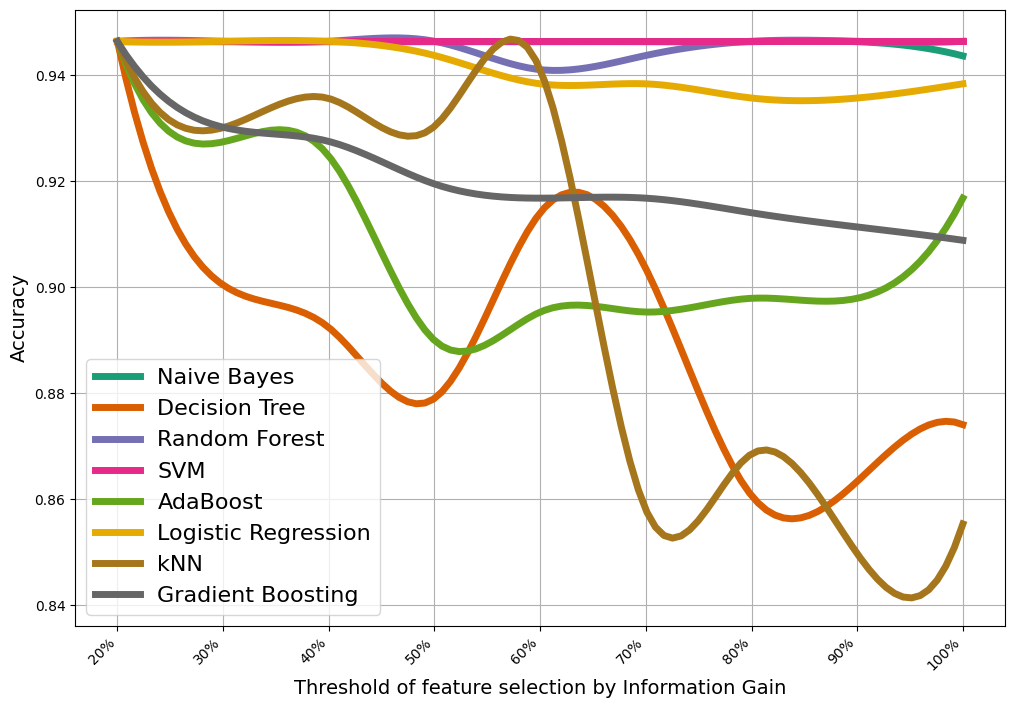

In [38]:
paint_graph(algo_accuracy, 'Accuracy')

<Figure size 640x480 with 0 Axes>

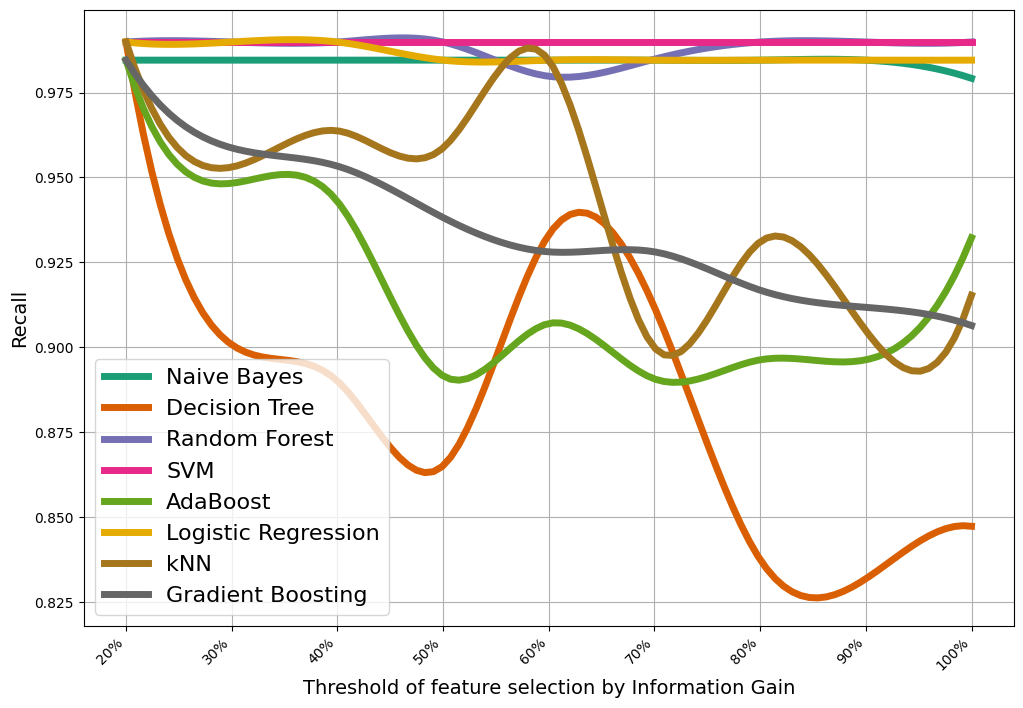

In [39]:
algo_recall = get_graph(1)
paint_graph(algo_recall, 'Recall')

<Figure size 640x480 with 0 Axes>

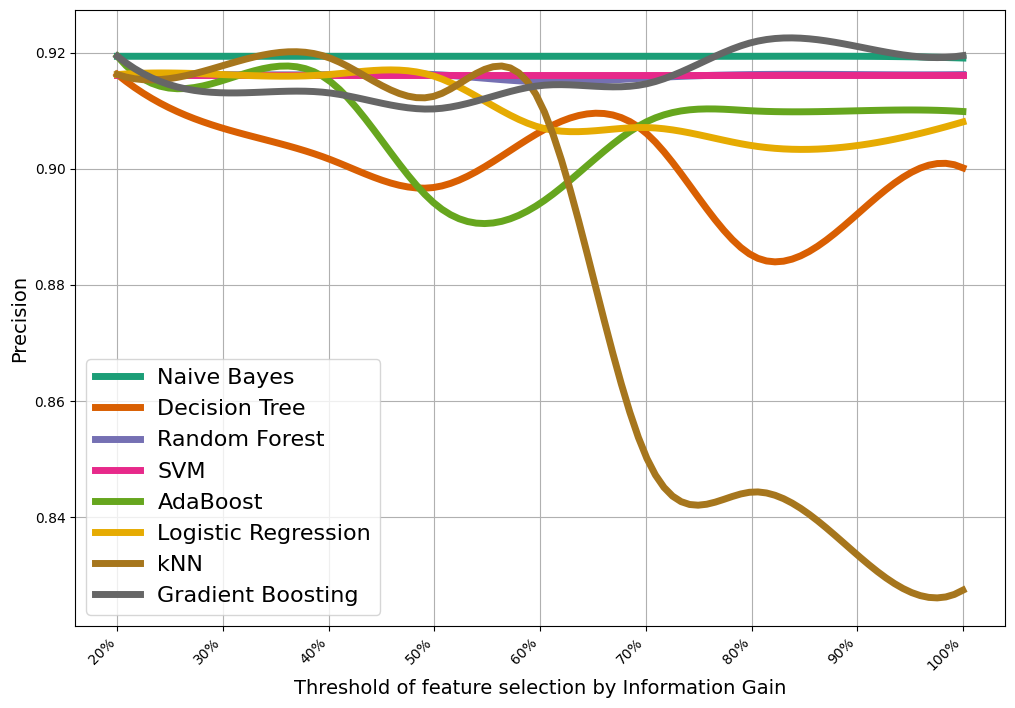

In [40]:
algo_precision = get_graph(2)
paint_graph(algo_precision, 'Precision')

<Figure size 640x480 with 0 Axes>

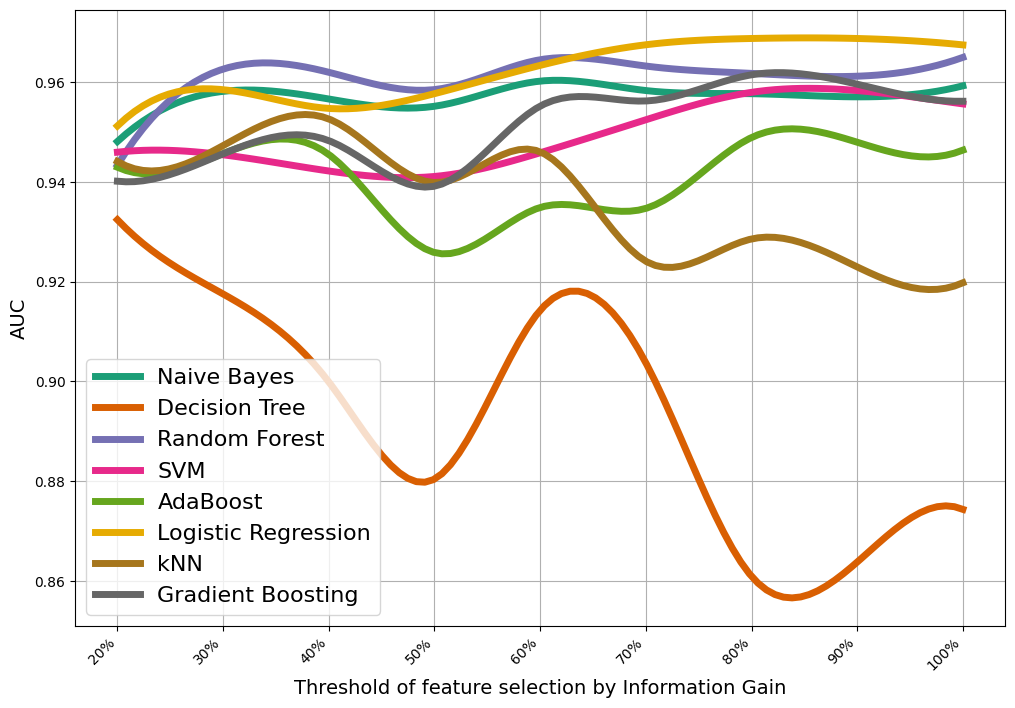

In [41]:
algo_roc = get_graph(3)
paint_graph(algo_roc, 'AUC')

<Figure size 640x480 with 0 Axes>

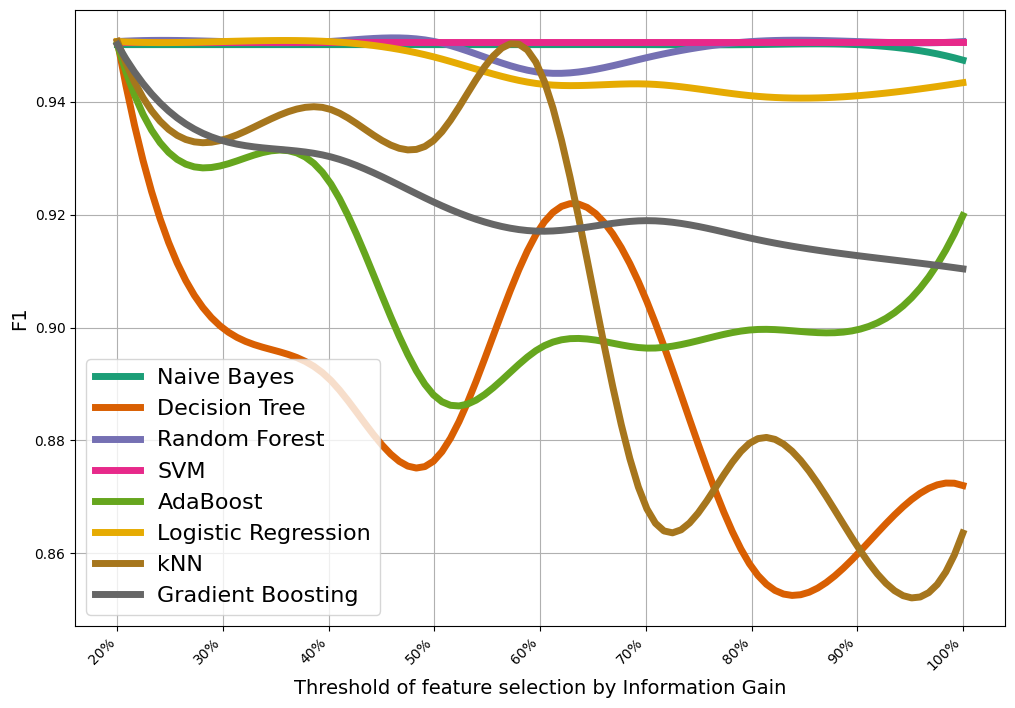

In [42]:
algo_f1 = get_graph(4)
paint_graph(algo_f1, 'F1')